## Observations and Insights 

### In the recent animal study, the complete data set for 249 mice identified with squamous cell carcinoma (SSC) was used to analyze and compare the performance of the drug of interest Capomulin versus the other treatment regiment. The time to observe and measure tumor development was 45 days.
### The data for one mouse found with duplicate timepoints were removed, the final count of mice was 248.

### The observations made based on the results obtained are as followed:


### 1.	From Summary Statistics for the drug Capomulin the average of tumor volume was 40.67 mm³ which is the second lowest volume. Ramicane was the best performing drug with 40.21mm³of the average tumor volume. Ramicane has the best performance from the all the drug regiments tested (median = 40.67. standard deviation = 4.84). Capomulin has the second best performance (median = 41.55 and standard deviation 4.99). All the other drugs finished with values for the average volume tumor above 50 mm³ (with the worst performance for Ketapril 55.23mm³, and Naftisol 54.33 mm³).

### 2.	There was approximately the same number of male mice (50.4%) and female mice (49.6%) tested. For the drug Capomulin there was the highest number of timepoints for mice tested reached – 230, followed by Ramicane with 228 timepoints, it means for the whole period of the test (45 days) most mice were able to survive through the whole period of testing. On the bottom of this measure were drugs Infubinol – 178 timepoints, Ceftamin – 178 timepoints and Propriva – 148 timepoints.

### 3.	A closer look was performed for data obtained for drugs Capomulin, Ramicane, Infubinol and Ceftamin. According to the Interquartile range (IRQ)calculation which measured the spread of the middle of 50%value in the dataset, the smallest IRQ is for the drug Capomulin 7.78 (lower quartile Q1 = 32.37, upper quartile Q3-=40.15). Ramicane had IQR 9.09 (with lower quartile Q1 = 31.56, upper quartile Q3-= 40.65). For Infubinol and Ceftamin the IRQ value is higher (11.47- Infubinol and 15.57 – Ceftamin), which means the data in the dataset is spread wider


In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(mouse_metadata)
#print(study_results)

# Combine the data into a single dataset
mice_study = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
mice_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [45]:
# Checking the number of mice.
mouse_count=mice_study["Mouse ID"].value_counts().count()
mouse_count

249

In [46]:
# duplicate mouse by ID and Timepoint
duplicate_mouse_df= mice_study[["Mouse ID", "Timepoint"]]
duplicate_df = duplicate_mouse_df[duplicate_mouse_df.duplicated(keep ="last")]
duplicate_df
#unique Mouse ID as a duplicate found
mouseID_duplicate= duplicate_df[["Mouse ID"]].squeeze().unique()
mouseID_duplicate


array(['g989'], dtype=object)

In [47]:
# Get all the data for the duplicate mouse ID
all_data_duplicate = mice_study[mice_study["Mouse ID"].isin(mouseID_duplicate)]
all_data_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mice_study.set_index(["Mouse ID"])
indexed_mouse_ID = clean_mouse_df.drop(mouseID_duplicate)
indexed_mouse_ID.sort_values(by="Timepoint").head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.0,0,Capomulin,Female,9,22
v409,0,45.0,0,Placebo,Female,16,25
u946,0,45.0,0,Propriva,Male,5,30
w140,0,45.0,0,Zoniferol,Female,19,30
a577,0,45.0,0,Infubinol,Female,6,25


In [49]:
# Checking the number of mice in the clean DataFrame.
grouped_indexed_ID=indexed_mouse_ID.groupby(["Mouse ID"])
mouse_clean_count=len(grouped_indexed_ID.count())
mouse_clean_count

248

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#reseting index to get a table
reset_data = indexed_mouse_ID.reset_index() 
reset_data  




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [51]:
#extracting columns Drug Regimen and Tumor Volume(mm3)
drugs_regimen_df=reset_data[["Drug Regimen","Tumor Volume (mm3)"]]
drugs_regimen_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,45.000000
1,Capomulin,45.651331
2,Capomulin,43.270852
3,Capomulin,43.784893
4,Capomulin,42.731552
...,...,...
1875,Capomulin,33.118756
1876,Capomulin,31.758275
1877,Capomulin,30.834357
1878,Capomulin,31.378045


In [52]:
#Calculating:
#mean
drugs_mean = drugs_regimen_df.groupby("Drug Regimen").mean()
drugs_mean = drugs_mean.rename(columns={"Tumor Volume (mm3)" : "Mean Tumor Volume"})
drugs_mean


,Mean Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [53]:
#median
drugs_median = drugs_regimen_df.groupby("Drug Regimen").median()
drugs_median = drugs_median.rename(columns={"Tumor Volume (mm3)" : "Median Tumor Volume"})
drugs_median

,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [54]:
#variance
drugs_variance = drugs_regimen_df.groupby("Drug Regimen").var()
drugs_variance = drugs_variance.rename(columns={"Tumor Volume (mm3)" : "Tumor Volume Variance"})
drugs_variance

,Tumor Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [55]:
#standard deviation
drugs_std =drugs_regimen_df.groupby("Drug Regimen").std()
drugs_std = drugs_std.rename(columns={"Tumor Volume (mm3)" : "Tumor Volume Stand.Dev."})
drugs_std

,Tumor Volume Stand.Dev.
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [56]:
#SEM
drugs_sem = drugs_regimen_df.groupby("Drug Regimen").sem()
drugs_sem  = drugs_sem.rename(columns={"Tumor Volume (mm3)" : "Tumor Volume Stand.Error"})
drugs_sem

,Tumor Volume Stand.Error
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [57]:
# Assemble the resulting series into a single summary dataframe.
summary_drug_stats_df = pd.merge(drugs_mean, drugs_median, on="Drug Regimen" )
summary_drug_stats1_df = pd.merge(drugs_variance,drugs_std, on ="Drug Regimen")
summary_drug_stats2_df = pd.merge(summary_drug_stats1_df, drugs_sem, on ="Drug Regimen")
final_summary_stats = pd.merge(summary_drug_stats_df, summary_drug_stats2_df, on ="Drug Regimen")
final_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stand.Dev.,Tumor Volume Stand.Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

stats_agg = drugs_regimen_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])
stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [59]:
timepoints = reset_data.groupby(["Drug Regimen"])
mice_tested= timepoints["Drug Regimen"].count().sort_values(ascending=False)
mice_tested


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice Tested')

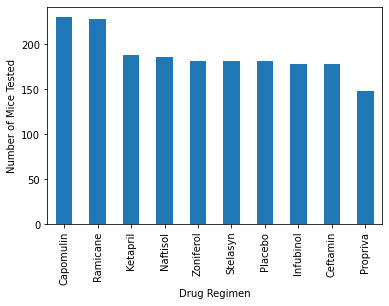

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugs_chart = mice_tested.plot(kind='bar')

# Set the xlabel and ylabel 
drugs_chart.set_xlabel("Drug Regimen")
drugs_chart.set_ylabel("Number of Mice Tested")



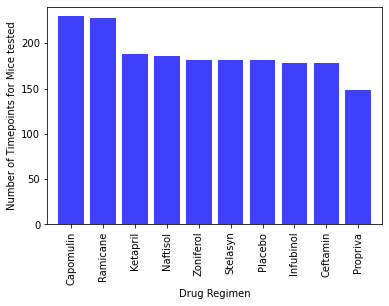

In [91]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints for Mice tested")

plt.xlim(-0.75, len(mice_tested) -.25)
plt.ylim(0, mice_tested.max() + 10)

plt.bar(mice_tested.keys(), mice_tested, facecolor="blue", alpha=0.75, align="center",)
plt.xticks(rotation=90)
plt.show()


In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouseID_df = reset_data[["Mouse ID","Sex"]].drop_duplicates()
mouseID_df
gender= mouseID_df.groupby(["Sex"])
gender_count = gender.count()

gender_count["Gender Percentage"]=gender_count /mouse_clean_count

gender_count

,Mouse ID,Gender Percentage
Sex,,
Female,123,0.495968
Male,125,0.504032


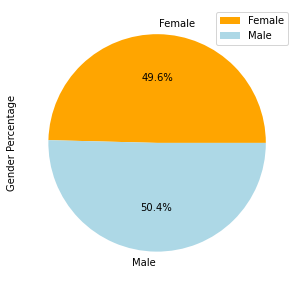

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plot = gender_count.plot.pie(y="Gender Percentage", figsize=(5,5), autopct="%1.1f%%", colors=["orange","lightblue"])


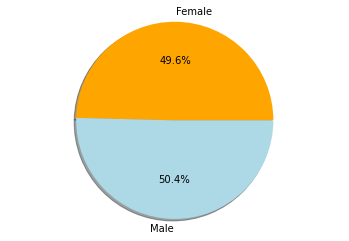

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count["Mouse ID"], labels=gender_count.index, colors=["orange","lightblue"],
        autopct="%1.1f%%", shadow=True )

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs_data_df = reset_data.set_index("Drug Regimen")
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
selected_drugs_df=drugs_data_df.loc[drug_list] 

# Start by getting the last (greatest) timepoint for each mouse
mouse_group_df=selected_drugs_df.groupby(["Mouse ID"])

timepoint_max_df =pd.DataFrame(mouse_group_df["Timepoint"].max())
timepoint_max_df.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45


In [66]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#merging
re_selected_drugs_df=selected_drugs_df.reset_index()

merged_timepoint_df= pd.merge(timepoint_max_df, re_selected_drugs_df[["Tumor Volume (mm3)","Mouse ID","Timepoint", "Drug Regimen"]], on=["Mouse ID","Timepoint"])
merged_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [67]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list


['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [92]:
#Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

indexed_drugs_df = merged_timepoint_df.set_index(["Drug Regimen"])
# loop through drugs
for drug in drug_list:
    print(f"\n----- {drug} ------")
    drug_df = indexed_drugs_df.loc[[drug]]
    # looping through tumor volume data to fill for plotting  
    tumor_volume.append(drug_df["Tumor Volume (mm3)"])
    
    #Calculate the IQR
    quartiles = drug_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
   
    print(f"The interquartile range of tumor volume is: {iqr}")
    
    # determine if there are any potential outliers. 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} or above {upper_bound} could be outliers.")
    # printing potential outliers
    outlier_tumor_volume = drug_df.loc[(drug_df["Tumor Volume (mm3)"] < lower_bound) | (drug_df["Tumor Volume (mm3)"] > upper_bound)]
    if outlier_tumor_volume.empty == False:
        print("Potential ouliers:")
        print(outlier_tumor_volume)
        


----- Capomulin ------
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
Values below 20.70456164999999 or above 51.83201549 could be outliers.

----- Ramicane ------
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
Values below 17.912664470000003 or above 54.30681135 could be outliers.

----- Infubinol ------
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
Values below 36.83290494999999 or above 82.74144559000001 could be outliers.
Potential ouliers:
             Mouse ID  Timepoint  Tumor Volume (mm3)
Drug Regimen                                        
Infubinol        c326          5           36.321346

----- Ceftamin ------
The lower quarti

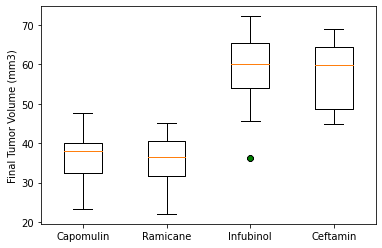

In [89]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volume,flierprops=dict(markerfacecolor='g', marker='8'))
plt.xticks([1,2,3,4], drug_list)
plt.show()

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [71]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

reset_data.head(20) 
#setting test mouse 
test_mouse = "b742"
one_mouse_ind_df = reset_data.set_index(["Mouse ID"])
one_mouse_ind_df
one_mouse_df = one_mouse_ind_df.loc[test_mouse]
one_mouse_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b742,0,45.000000,0,Capomulin,Male,7,21
b742,5,41.534097,0,Capomulin,Male,7,21
b742,10,41.999228,0,Capomulin,Male,7,21
b742,15,39.524843,0,Capomulin,Male,7,21
b742,20,37.950355,0,Capomulin,Male,7,21
b742,25,38.617684,0,Capomulin,Male,7,21
b742,30,39.167949,0,Capomulin,Male,7,21
b742,35,39.847576,0,Capomulin,Male,7,21
b742,40,38.255627,0,Capomulin,Male,7,21


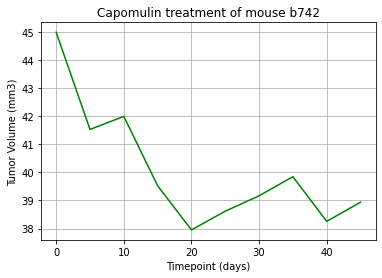

In [72]:
#line plot
time = len(one_mouse_df)
x = one_mouse_df["Timepoint"]
y = one_mouse_df["Tumor Volume (mm3)"]

plot_mouse, = plt.plot(x, y, color="green")
plt.title("Capomulin treatment of mouse " + test_mouse)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

In [73]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#setting data for Capomulin regimen
drugs_data_df
Capomulin_df=drugs_data_df.loc["Capomulin"]
Capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Capomulin,b128,5,45.651331,0,Female,9,22
Capomulin,b128,10,43.270852,0,Female,9,22
Capomulin,b128,15,43.784893,0,Female,9,22
Capomulin,b128,20,42.731552,0,Female,9,22
...,...,...,...,...,...,...,...
Capomulin,m601,25,33.118756,1,Male,22,17
Capomulin,m601,30,31.758275,1,Male,22,17
Capomulin,m601,35,30.834357,1,Male,22,17


In [74]:
#calculating average tumor for each mouse 
mouse_capomulin_df = Capomulin_df.groupby(["Mouse ID"]).mean()
mouse_capomulin_df


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


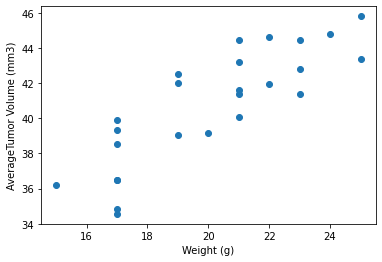

In [75]:
#plotting
plt.scatter(mouse_capomulin_df["Weight (g)"],mouse_capomulin_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("AverageTumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [77]:
#getting the data
average_capomulin_df =mouse_capomulin_df.reset_index()
average_capomulin_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
0,b128,22.5,41.963636,0.70,9.0,22.0
1,b742,22.5,40.083699,0.00,7.0,21.0
2,f966,10.0,36.505973,0.00,16.0,17.0
3,g288,22.5,41.990097,0.80,3.0,19.0
4,g316,22.5,44.613344,1.00,22.0,22.0
5,i557,22.5,44.805810,0.20,1.0,24.0
6,i738,22.5,39.141053,0.60,23.0,20.0
7,j119,22.5,44.465236,0.60,7.0,23.0
8,j246,17.5,43.216925,0.25,21.0,21.0
9,l509,22.5,44.434474,1.40,17.0,21.0


In [78]:
# Calculation of the correlation coefficient
average_tumor = average_capomulin_df.iloc[:,2]
weight= average_capomulin_df.iloc[:,5]
print(f"The correlation coefficient between weight and the average tumor volume is {round(st.pearsonr(average_tumor,weight)[0],2)}")


The correlation coefficient between weight and the average tumor volume is 0.84


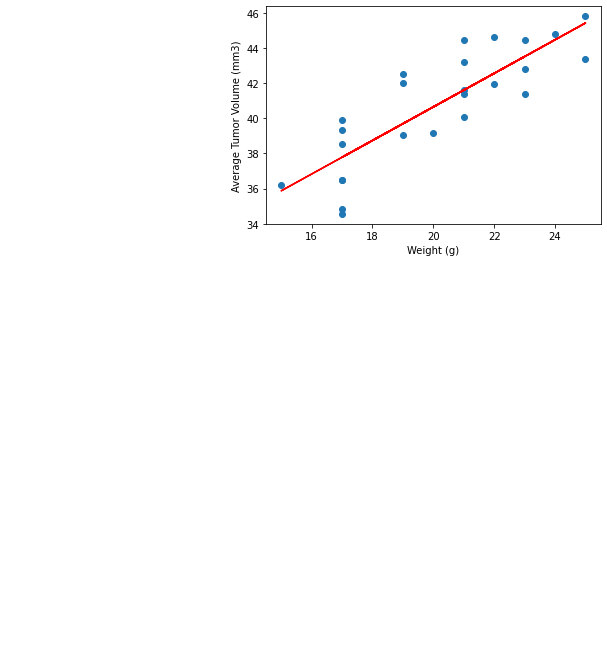

In [83]:
#Calculation of the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress
#setting up x and y values
weight_mouse= average_capomulin_df.iloc[:,5]
av_tumor = average_capomulin_df.iloc[:, 2]
x_values = weight_mouse
y_values = av_tumor

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()